## Encontrar uma função exponencial obtida pelo MMQ que melhor descreve os cados do COVID-19
### Estamos em busca dos valores dos coeficientes a, b da função exponencial I=a.b^t que melhor descreve o comportamento dos dados discretos.
### t: dias
### I: casos confirmados
#### Utilizando os dados de contágio do covid-19 no Brasil ( https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6 ) faça uma previsão para o número de infectados para o dia 30/03. Informe o intervalo de dias utilizado para criar a aproximação. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mmq(U, y): #função para resolução do M.M.Q, sendo que A é uma matriz onde a coluna j é dada por ti^j, e b é um vetor composto pelos valores das ordenadas (o y de cada ponto)
    B = U.T.dot(U) #chama-se de B, a matriz resultante da multiplicação A(transposta) por A.
    c = U.T.dot(y) #chama-se de c, a matriz resultante da multiplicação A(transposta) por b.
    a = np.linalg.solve(B, c) #chama-se de a, o vetor resultante da solução do sistema linear (Ba = y), ou seja, estamos resolvento Bx=A(transposta)b
    return a #retornando o vetor resultante, esse vetor possui o valor dos coeficientes que estamos procurando

In [3]:
def aprox_dados(x, y, n):                #método para realizar uma aproximação de dados, t é um vetor composto pelos valores das abscissas (o x de cada ponto), b é um vetor composto pelos valores das ordenadas (o y de cada ponto), e n é o grau de aproximação (se for uma reta, n=2, se for uma parábola, n=3) 
    m = x.shape[0]                       #t.shape retorna uma tupla com a quantidade de elementos que t possui, logo vamos acessar esse valor por essa instrução
    U = np.ones([m, n])                  #cria uma matriz de 1 (real) com dimensão m por n
    x = x.reshape([m])                   #reshape cria um novo array sem alterar seu valor, apenas sua organização de linas e colunas, nesse caso estamos apenas copiando
    for j in range(1, n):                #temos que A será aquela matriz onde a coluna j é dada por ti^j
        U[:,j] = np.multiply(U[:,j-1], x) #para formar essa matriz, basta colocar na coluna j o valor da multiplicação da coluna anterior por t
    a = mmq(U, y)                        #agora basta resolver o sistema pelo MMQ
    return a                             #retornando o vetor resultante, esse vetor possui o valor dos coeficientes que estamos procurando

In [4]:
def aprox_exp(x, y, n):                     #método que realiza as transformações necessárias para realizar uma aproximação via método dos minimos quadrados                                        #linearizando os dados de entrada do problema e resolvendo via MMQ (aplicado no problema linearizado)
    coef = aprox_dados(x, np.log(y), 2) #para o caso de aproximação de função exponencial, b é um vetor composto pelo ln() das ordenadas dos dados de entrada
    a, b = np.exp(coef) 
    return(a, b)                                    #retornando aos parâmetros originais(coef[0]=ln(a) e coef[1]=ln(b))
   

0.4372936994861657 1.3621653426034508
21818.110838981254


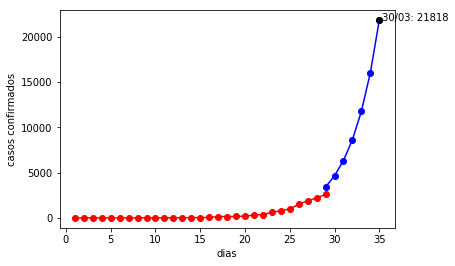

In [5]:
dias = np.array([i for i in range(1, 30)]) #dia 1 ao 29
casos_conf = np.array([1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,
                       321,372,621,793,1000,1500,1900,2200,2600], dtype=np.float) #casos confirmados do dia 25/02/20 a 24/03/20
a, b = aprox_exp(dias, casos_conf, 2)                                                #result armazena os valores dos coeficientes procurados (a0 e a1)

print(a,b)
print(a*b**35)

#plotando o gráfico
plt.plot(dias, casos_conf, 'ro-')         #plotando os dados já conhecidos
prox_dias = np.linspace(29, 35, 7)
plt.plot(prox_dias, a*b**prox_dias, 'bo-') #plotando os dados previstos
#plt.plot(dias, a*b**dias, 'b-') #plotando os dados previstos
plt.plot(35, a*b**35, 'ko') #destaque do dia 30/03
plt.text(35, a*b**35, ' 30/03: %d' % (int(a*b**35))) #escrevendo o texto
plt.ylabel('casos confirmados')
plt.xlabel('dias')
plt.show()

0.5102935581561809 1.3429824995694857
15498.242612046688


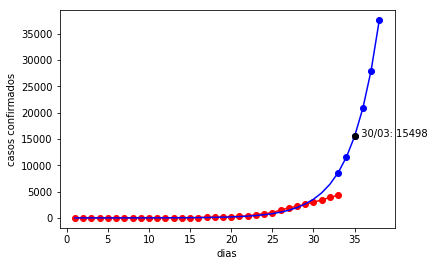

In [6]:
dias = np.array([i for i in range(1, 34)]) #dia 1 ao 33
casos_conf = np.array([1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,
                       321,372,621,793,1000,1500,1900,2200,2600,3000,3400,3900,
                       4300]) #casos confirmados do dia 25/02/20 a 28/03/20
a, b = aprox_exp(dias, casos_conf, 2) #result armazena os valores dos coeficientes procurados (a0 e a1)

print(a,b)
print(a*b**35)

#plotando o gráfico
plt.plot(dias, casos_conf, 'ro-')  #plotando os dados já conhecidos
prox_dias = np.linspace(33, 38, 6)
plt.plot(prox_dias, a*b**prox_dias, 'bo-') #plotando os dados previstos
plt.plot(dias, a*b**dias, 'b-') #plotando os dados previstos
plt.plot(35, a*b**35, 'ko') #destaque do dia 30/03
plt.text(35, a*b**35, '  30/03: %d' % (int(a*b**35))) #escrevendo o texto
plt.ylabel('casos confirmados')
plt.xlabel('dias')
plt.show()